### Code Excercise on Softmaxt Regression

- Following example from [this post](https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16)

In [1]:
# Import libraries. Basic libraries like pandas, numpy have been loaded during initialization
from sklearn import datasets
images, digits = datasets.load_digits(return_X_y=True)

Text(0.5, 1.0, 'Image for 0')

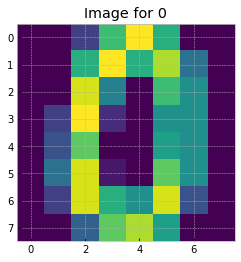

In [2]:
# pick onenumber for example
idx = np.random.randint(0, len(digits))
plt.imshow(images[idx,:].reshape(8, 8))
plt.title(f'Image for {digits[idx]}')

In [3]:
class softmax_regression():
    
    def __init__(self, lr=1e-5, n_iter=1000, lam=1):
        self.lr = lr
        self.n_iter = n_iter
        self.lam = lam
    
    # utitily function that turns a list of labels into one-hot matrix
    def one_hot(self, labels):
        num_labels = labels.shape[0]
        num_classes = len(np.unique(labels))
        index_offset = np.arange(num_labels) * num_classes
        labels_one_hot = np.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels.ravel()] = 1
        return labels_one_hot
    
    # softmax function
    def softmax(self, z):
        # subtract max to prevent overflow
        z -= np.max(z)
        sm = 1 / (1 + np.exp(-z))
        return sm
    
    # loss function & gradient
    def loss(self, X, y_mat): 
        N, D = X.shape
        Z = X.dot(self.W)
        prob = self.softmax(Z)
        loss = (-1 / N) * np.sum(y_mat * np.log(prob)) + (self.lam / 2) * np.sum(self.W * self.W)
        grad = (-1 / N) * X.T.dot((y_mat - prob)) + self.lam * self.W
        return loss, grad
        
    def predict(self, X):
        probs = self.softmax(X.dot(self.W))
        preds = np.argmax(probs, axis = 1)
        return preds
        
    def fit(self, X, y):
        y_mat = self.one_hot(y)
        N, D = X.shape
        self.W = np.zeros((X.shape[1], len(np.unique(y))))
        self.losses = np.zeros(self.n_iter)
        for i in range(self.n_iter):
            loss, grad = self.loss(X, y_mat)
            self.losses[i] = loss
            self.W -= self.lr * grad

In [13]:
## test results

SM = softmax_regression(n_iter=10000)
SM.fit(images, digits)
test_results = SM.predict(images)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(digits, test_results))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.81      0.83      0.82       182
           2       0.95      0.89      0.92       177
           3       0.95      0.90      0.92       183
           4       0.97      0.92      0.95       181
           5       0.91      0.92      0.92       182
           6       0.97      0.97      0.97       181
           7       0.89      0.97      0.93       179
           8       0.86      0.80      0.83       174
           9       0.80      0.88      0.84       180

   micro avg       0.91      0.91      0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [6]:
## reference using sklearn logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=2)
LR.fit(images, digits)
sk_results = SM.predict(images)
print(classification_report(digits, sk_results))

C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       178
           1       0.77      0.82      0.79       182
           2       0.92      0.91      0.91       177
           3       0.89      0.92      0.91       183
           4       0.94      0.94      0.94       181
           5       0.94      0.88      0.91       182
           6       0.90      0.98      0.94       181
           7       0.84      0.99      0.91       179
           8       0.97      0.57      0.72       174
           9       0.79      0.84      0.81       180

   micro avg       0.89      0.89      0.89      1797
   macro avg       0.89      0.89      0.88      1797
weighted avg       0.89      0.89      0.88      1797



In [15]:
LR.coef_

array([[ 0.00000000e+00, -5.22479941e-02, -3.96706785e-02,
         4.95953072e-02, -1.07637995e-01, -4.24795069e-01,
        -3.13265374e-01, -3.19558492e-02, -9.92603597e-06,
        -1.27766568e-01, -1.23657899e-02,  2.07448931e-01,
         2.43238094e-01,  3.14792505e-01,  5.99289757e-03,
        -3.59978221e-02, -6.30216870e-03,  1.13613834e-01,
         2.44071861e-01, -7.29410028e-02, -4.32221461e-01,
         3.50494373e-01, -1.94997496e-02, -1.62121182e-02,
        -3.14985704e-03,  2.09058257e-02, -9.39211309e-02,
        -1.86672273e-01, -7.21991849e-01,  3.56666478e-02,
         4.76577350e-02, -1.17501457e-04,  0.00000000e+00,
         3.03770242e-01,  1.77673732e-01, -1.45128820e-01,
        -7.13250293e-01, -6.04888463e-02, -7.65464294e-02,
         0.00000000e+00, -1.84622858e-03, -2.81183588e-02,
         2.42038253e-01, -3.36334508e-01, -3.19470290e-01,
         9.31482125e-03,  1.63847968e-01, -6.97429967e-05,
        -9.14997050e-04, -1.52453477e-01,  2.61533206e-0

In [12]:
SM.W.T

array([[ 0.00000000e+00, -7.42925460e-04, -8.95723491e-03,
        -1.70800052e-02, -1.88686493e-02, -1.17666336e-02,
        -3.52609757e-03, -3.72364382e-04, -1.19479346e-05,
        -4.08958709e-03, -1.40370486e-02, -1.71485619e-02,
        -1.42807683e-02, -9.47312222e-03, -3.85934309e-03,
        -3.19827169e-04, -7.61161167e-06, -3.03020775e-03,
        -1.14001254e-02, -1.20442101e-02, -1.49239999e-02,
        -7.88543123e-03, -1.46198806e-03, -1.42879662e-04,
        -2.91926787e-06, -1.41435177e-03, -1.10972468e-02,
        -1.93721082e-02, -2.37747736e-02, -1.06070079e-02,
        -1.76461355e-04, -5.93570688e-06,  0.00000000e+00,
        -6.27515844e-04, -8.46609738e-03, -2.09102850e-02,
        -2.48938015e-02, -1.40518582e-02, -9.27138316e-04,
         0.00000000e+00, -2.45430502e-05, -8.84336109e-04,
        -4.66548199e-03, -1.59342267e-02, -1.72394184e-02,
        -9.98734719e-03, -3.49734990e-03, -6.24176365e-05,
        -2.01202492e-05, -1.03844205e-03, -6.39546484e-0